In [1]:
#Importar imágenes
from skimage import io
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Pack 1muyvisiblesbastantefiable
pathMasc="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\1muyvisiblesbastantefiable\\9stmarcado.bmp"
pathImg="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\1muyvisiblesbastantefiable\\9storiginal.bmp"
#pathCSV="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\1muyvisiblesbastantefiable\\9stlinea.csv"

img = io.imread(pathImg)
msc = io.imread(pathMasc)

#Pack 2muyvisiblesbastantefiable2
pathMasc2="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\2muyvisiblesbastantefiable2\\MIR3Amarcado.bmp"
pathImg2="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\2muyvisiblesbastantefiable2\\MIR3Aoriginal.bmp"

img2 = io.imread(pathImg2)
msc2 = io.imread(pathMasc2)

#Pack 3pocovisiblepocofiable
pathMasc3="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\3pocovisiblepocofiable\\8stmarcado.bmp"
pathImg3="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\3pocovisiblepocofiable\\8storiginal.bmp"

img3 = io.imread(pathImg3)
msc3 = io.imread(pathMasc3)

#Pack 4pocovisiblesbastantefiable
pathMasc4="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\4pocovisiblesbastantefiable\\5stmarcado.bmp"
pathImg4="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\4pocovisiblesbastantefiable\\5storiginal.bmp"

img4 = io.imread(pathImg4)
msc4 = io.imread(pathMasc4)

#Pack 5pocovisiblesbastantefiable2
pathMasc5="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\5pocovisiblesbastantefiable2\\MTVmarcado.bmp"
pathImg5="C:\\Users\\Andres\\Documents\\GitHub\\Perikymata2017\\prototypes\\imagenesParaEnviar\\5pocovisiblesbastantefiable2\\MTVoriginal.bmp"

img5 = io.imread(pathImg5)
msc5 = io.imread(pathMasc5)

In [2]:
from skimage.color import rgb2lab,gray2rgb
from skimage.morphology import skeletonize
from skimage.color import rgb2gray

"Función de Ismael"
def distancia_al_rojo(img, pixel):
        """
        Metodo para:
        Pasamos la imagen al espacio de color RGB y nos quedamos con el canal rojo
        Pasamos la imagen al espacio de color HSV
        Normalizamos la imagen del espacio de color HSV para utilizar que distancia 
        al rojo tenemos y poder hacer el theshold.
        
        @param img: imagen original leida anteriormente.
        @return: distance_red: distancia de cada pixel al rojo para luego hacer el threshold.
        
        """ 
        r,g,b = pixel        
        g,v,b=rgb2lab([[[r/255,g/255,b/255]]])[0][0]
        
        lab=rgb2lab(img)
        distance_red=abs(lab - [g,v,b]).mean(axis=2)
        return distance_red

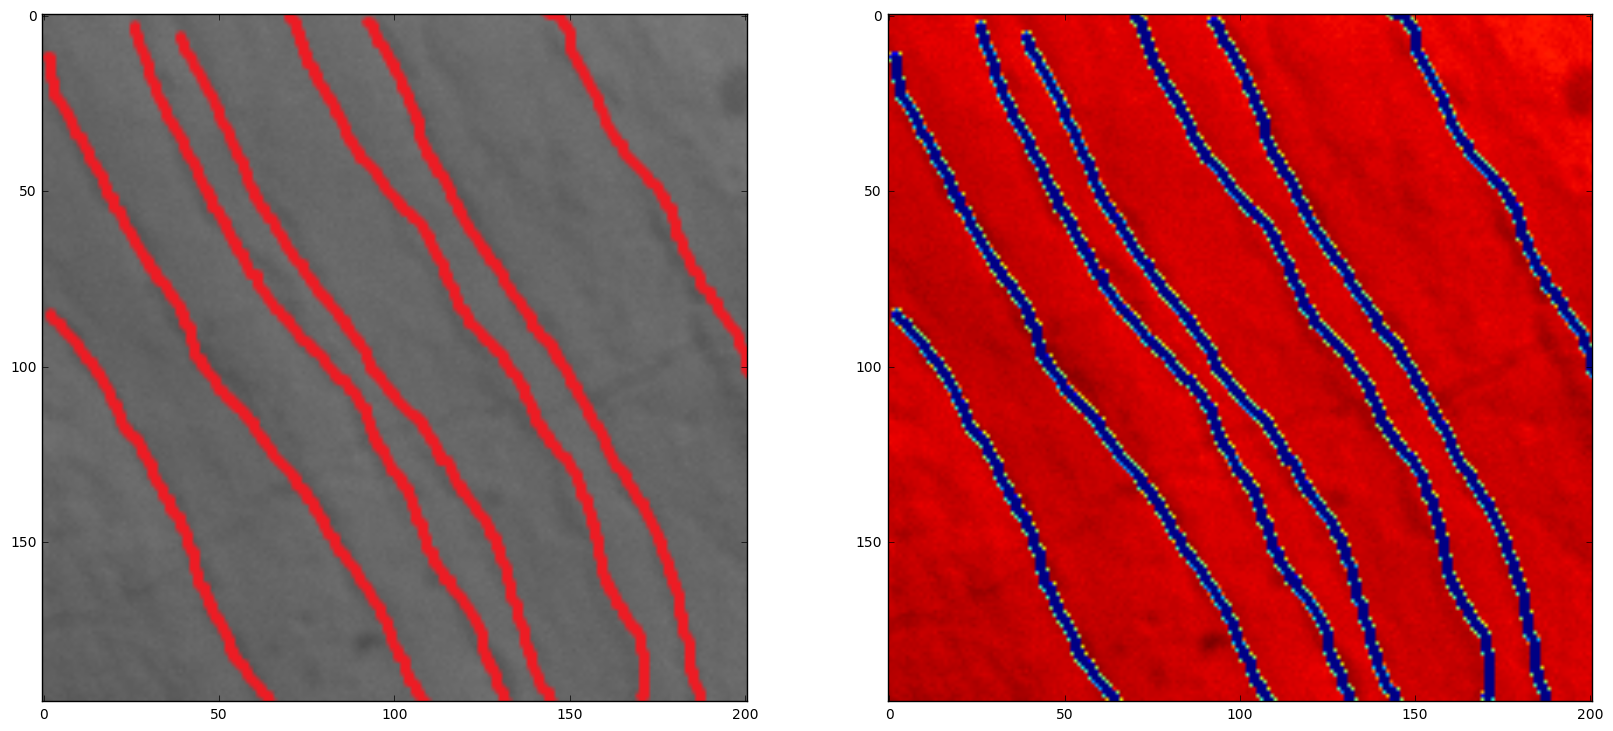

In [3]:
mskRojo=distancia_al_rojo(msc, [255, 0, 0])
plt.figure();
f, axes = plt.subplots(1,2,figsize=(20, 20));
axes[0].imshow(msc);
axes[1].imshow(mskRojo);

In [4]:
#Calcular threshold
import skimage.filters as fil

print('Li:',fil.threshold_li(mskRojo))
print('Isodata:', fil.threshold_isodata(mskRojo))
print('Otsu:', fil.threshold_otsu(mskRojo))
print('Yen:', fil.threshold_yen(mskRojo))

Li: 18.138703652
Isodata: 31.2076167593
Otsu: 31.2076167593
Yen: 51.6487538199


Threshold: 18.138703652


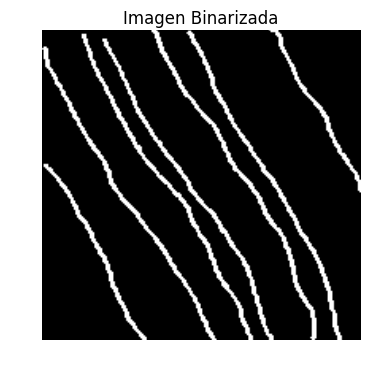

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def aplicarUmbral(img, TipoUmbral):
    threshold = None;
    if TipoUmbral == 'Li':
        threshold = fil.threshold_li(img);
    elif TipoUmbral == 'Isodata':
        threshold = fil.threshold_isodata(img);
    elif TipoUmbral == 'Otsu':
        threshold = fil.threshold_otsu(img);
    elif TipoUmbral == 'Yen':
        threshold = fil.threshold_yen(img);
    
    print('Threshold:',threshold);
    plt.figure();
    plt.axis('off');
    plt.title('Imagen Binarizada');
    plt.imshow((img<threshold), cmap='gray');
        
interact(aplicarUmbral, img=fixed(mskRojo), TipoUmbral=('Li', 'Isodata', 'Otsu', 'Yen'));

In [6]:
#Skeletonizar mascara
binMask = mskRojo<fil.threshold_li(mskRojo);
skelMask = skeletonize(binMask);

In [7]:
#Binarizar imagen de muestra y esqueletonizarla
from skimage.color import rgb2grey
from skimage import exposure 
from skimage.restoration import denoise_tv_chambolle

from _frangi import frangi, hessian
from skimage.filters import threshold_li
from skimage import morphology
from skimage.morphology import skeletonize

def tratamientoImagen(img):
    """
    Esta función sirve para preparar la imagen que vamos a comparar con la máscara
    Aplica una serie de filtros a una imagen, la binariza y la esqueletoniza.
    @param img: imagen de muestra a comparar con la máscara.
    @return no_smallF: imagen esqueletonizada sin objetos pequeños.
    """
    img = rgb2grey(img)
    imgAdapted = exposure.equalize_adapthist(img, clip_limit=0.91,nbins =100)
    imgAdaptedDenoise = denoise_tv_chambolle(imgAdapted, weight=0.1)
    
    frangiImg = frangi(imgAdaptedDenoise)
    threshF = threshold_li(frangiImg)
    thresholdedF = frangiImg >= threshF
    skF=skeletonize(thresholdedF)
    #Probamos con 70
    no_smallF = morphology.remove_small_objects(skF, min_size=70,connectivity =100)

    return no_smallF

In [8]:
def tratamientoMascara(mask):
    """
    Función para binarizar la máscara y esqueletonizarla
    @param mask mascara
    @return skelMask mascara binarizada y esqueletonizada
    """
    mskRojo = distancia_al_rojo(mask, [255, 0, 0])
    binMask = mskRojo<fil.threshold_li(mskRojo)
    skelMask = skeletonize(binMask);
    return skelMask   

E:\Andres\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


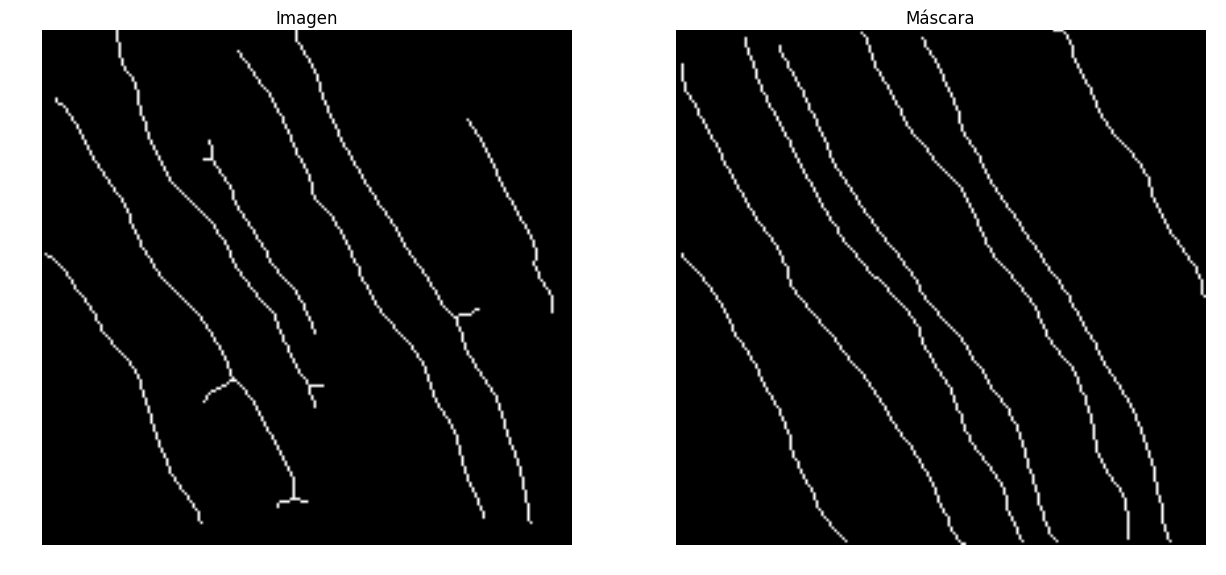

In [9]:
#Imagen esqueletonizada
skelImg = tratamientoImagen(img);
plt.figure();
f, axes = plt.subplots(1,2,figsize=(15, 15));
for axe in axes:
    axe.axis('off');

axes[0].set_title("Imagen");
axes[1].set_title("Máscara");

axes[0].imshow(skelImg, cmap='gray');
axes[1].imshow(skelMask, cmap='gray');

In [10]:
#Evaluar distancia
# from wiki. Pone str pero funciona con listas tb
# Fuente: https://es.wikipedia.org/wiki/Distancia_de_Levenshtein#Python
def distance(str1, str2):
    """
    Distancia de Levenshtein
    """
    d=dict()
    for i in range(len(str1)+1):
        d[i]=dict()
        d[i][0]=i
    for i in range(len(str2)+1):
        d[0][i] = i
    for i in range(1, len(str1)+1):
        for j in range(1, len(str2)+1):
            d[i][j] = min(d[i][j-1]+1, d[i-1][j]+1, d[i-1][j-1]+(not str1[i-1] == str2[j-1]))
    return d[len(str1)][len(str2)]

In [11]:
def getDifferences(img1, img2):
    """
    Devuelve una lista con las diferencias en cada linea de las imágenes
    @param img1 imagen 1
    @param img2 imagen 2
    @return lista de diferencias
    """
    differences = list()
    for i in range(len(img1)):
        differences.append(distance(img1[i], img2[i]))
    return differences
    

In [ ]:
# Probar? https://gist.github.com/attilaolah/1940208#file-imgcmp-py
# Probar? http://mlpy.sourceforge.net/  mlpy.dtw_std(x,y) puede hacer Dynamic Time Wrapping
skelMask = skelMask.astype(int)
skelImg = skelImg.astype(int)

differences= getDifferences(skelImg, skelMask)

# Utilizamos la media para saber cuales son las diferencias respecto a la máscara
print('Primer pack:', np.mean(differences))

Primer pack: 8.09693877551


In [ ]:
skelMask2 = tratamientoMascara(msc2);
skelMask3 = tratamientoMascara(msc3);
skelMask4 = tratamientoMascara(msc4);
skelMask5 = tratamientoMascara(msc5);

In [ ]:
skelImg2 = tratamientoImagen(img2);
skelImg3 = tratamientoImagen(img3);
skelImg4 = tratamientoImagen(img4);
skelImg5 = tratamientoImagen(img5);

In [ ]:
differences2 = getDifferences(skelImg2, skelMask2);
differences3 = getDifferences(skelImg3, skelMask3);
differences4 = getDifferences(skelImg4, skelMask4);
differences5 = getDifferences(skelImg5, skelMask5);

print('Segundo pack:', np.mean(differences2))
print('Tercer pack:', np.mean(differences3))
print('Cuarto pack:', np.mean(differences4))
print('Quinto pack:', np.mean(differences4))